You are given a m x n matrix grid consisting of non-negative integers where grid[row][col] represents the minimum time required to be able to visit the cell (row, col), which means you can visit the cell (row, col) only when the time you visit it is greater than or equal to grid[row][col].

You are standing in the top-left cell of the matrix in the 0th second, and you must move to any adjacent cell in the four directions: up, down, left, and right. Each move you make takes 1 second.

Return the minimum time required in which you can visit the bottom-right cell of the matrix. If you cannot visit the bottom-right cell, then return -1.

 

Example 1:

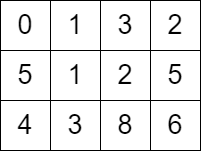

Input: grid = [[0,1,3,2],[5,1,2,5],[4,3,8,6]]
Output: 7
Explanation: One of the paths that we can take is the following:
- at t = 0, we are on the cell (0,0).
- at t = 1, we move to the cell (0,1). It is possible because grid[0][1] <= 1.
- at t = 2, we move to the cell (1,1). It is possible because grid[1][1] <= 2.
- at t = 3, we move to the cell (1,2). It is possible because grid[1][2] <= 3.
- at t = 4, we move to the cell (1,1). It is possible because grid[1][1] <= 4.
- at t = 5, we move to the cell (1,2). It is possible because grid[1][2] <= 5.
- at t = 6, we move to the cell (1,3). It is possible because grid[1][3] <= 6.
- at t = 7, we move to the cell (2,3). It is possible because grid[2][3] <= 7.
The final time is 7. It can be shown that it is the minimum time possible.

Example 2:

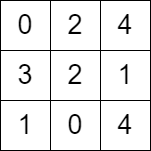

Input: grid = [[0,2,4],[3,2,1],[1,0,4]]
Output: -1
Explanation: There is no path from the top left to the bottom-right cell.

 

Constraints:

    m == grid.length
    n == grid[i].length
    2 <= m, n <= 1000
    4 <= m * n <= 105
    0 <= grid[i][j] <= 105
    grid[0][0] == 0

 

In [ ]:
class Solution:
    def minimumTime(self, grid: List[List[int]]) -> int:
        moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        m = len(grid)
        n = len(grid[0])
        if grid[0][1] > 1 and grid[1][0] > 1:
            return -1
        
        times = [[float("inf") for _ in grid[0]] for _ in grid]
        q = [(0, 0, 0)]
        while q:
            time, row, col = heapq.heappop(q)
            if times[row][col] == float("inf"):
                times[row][col] = time
                time += 1
                for move in moves:
                    new_row, new_col = row + move[0], col + move[1]
                    if 0 <= new_row < m and 0 <= new_col < n:
                        addition = 0
                        if grid[new_row][new_col] > time:
                            addition = grid[new_row][new_col] - time + (grid[new_row][new_col] - time) % 2
                        heapq.heappush(q, (time + addition, new_row, new_col))
        return times[-1][-1]
